In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
from mpl_toolkits.mplot3d import Axes3D

In [2]:
tau = 0.01
h   = 0.01

tests_ranges = np.linspace(100, 3000, num=100)


In [ ]:

# run tests on sequential and parallel versions

sequential = np.zeros(tests_ranges.size)
parallel4 = np.zeros(tests_ranges.size)
acceleration = np.zeros(tests_ranges.size)


for i in range(tests_ranges.size):
    K = M = tests_ranges[i]

    # execute sequential algo
    out = !./sequential.out {K} {M} {tau} {h}
    regexMatch = re.search("\d+\.\d+(e-\d+)*", out[0])
    sequential[i] = regexMatch[0]
    

    # execute parallel algo
    out = !mpirun  -np 4  --use-hwthread-cpus ./parallel.out {K} {M} {tau} {h}
    regexMatch = re.search("\d+\.\d+(e-\d+)*", out[0])
    parallel4[i] = regexMatch[0]
    
    acceleration[i] = 1.0 * parallel4[i] / sequential[i]


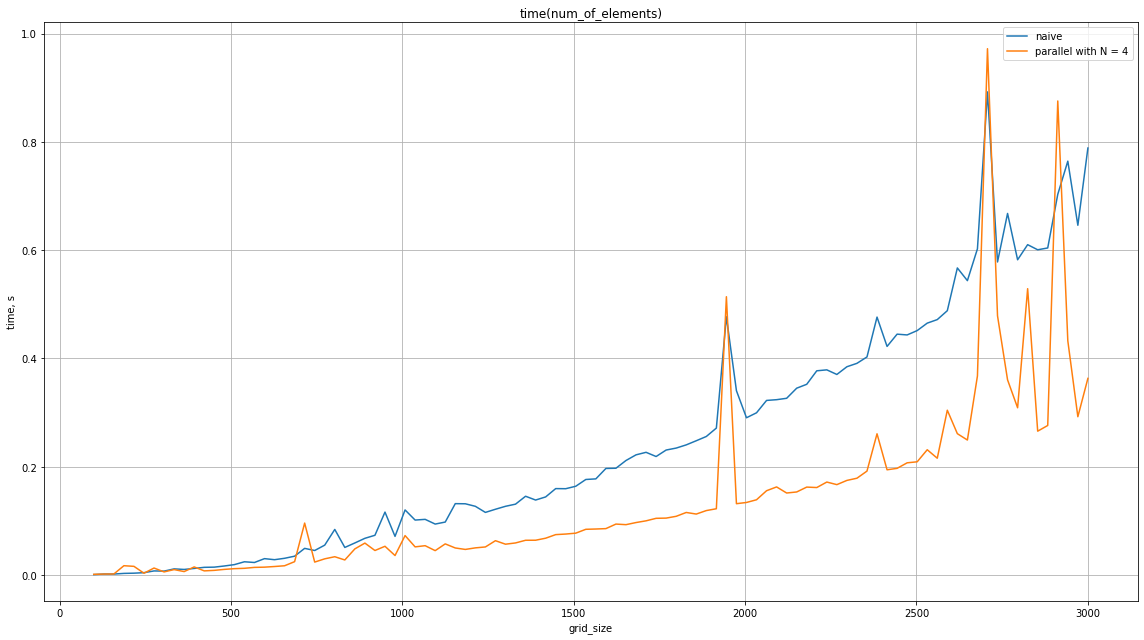

In [7]:

plt.figure(figsize = [16, 9])

plt.title(label = 'time(num_of_elements)')
plt.xlabel("grid_size")
plt.ylabel("time, s")

plt.plot(tests_ranges, sequential, label="naive")
plt.plot(tests_ranges, parallel4, label="parallel with N = 4")


plt.tight_layout() 
plt.legend()
plt.grid()
plt.show()



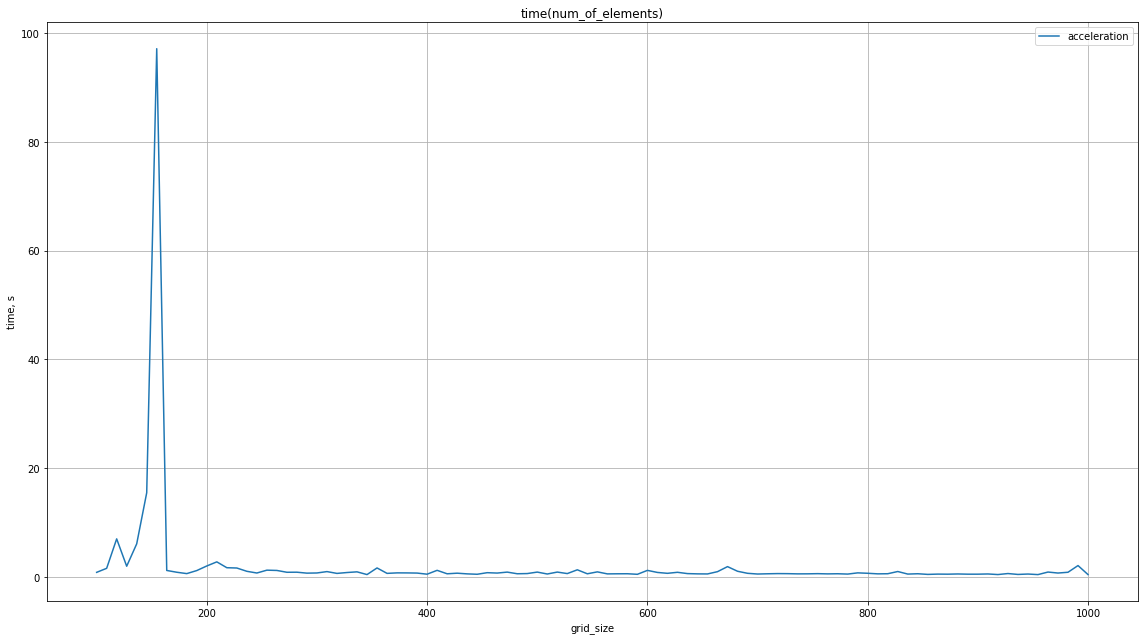

In [33]:
plt.figure(figsize = [16, 9])

plt.title(label = 'time(num_of_elements)')
plt.xlabel("grid_size")
plt.ylabel("time, s")

plt.plot(tests_ranges, acceleration, label="acceleration")

plt.tight_layout() 
plt.legend()
plt.grid()
plt.show()






98
98


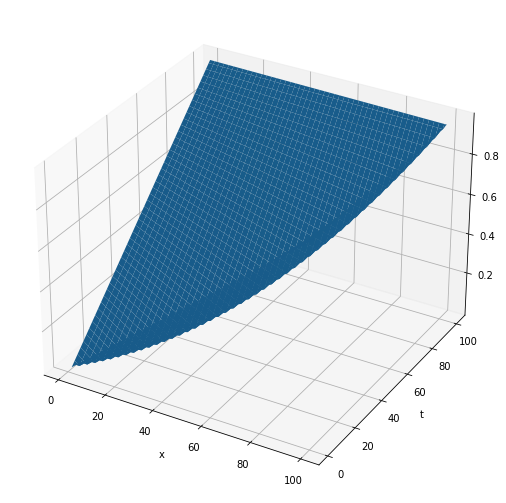

In [50]:


f_t_x = np.loadtxt('result_2.dat')
x = y = np.linspace(1, 100, num=98)


print(len(f_t_x))
print(len(f_t_x[0]))
# for i in range(len(f_t_x)):
#     print(len(f_t_x[i]))
#     f_t_x[i] = np.append(f_t_x[i], 1)
#     print(len(f_t_x[i]))

hf = plt.figure(figsize = [16, 9])
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, f_t_x)
plt.xlabel('x')
plt.ylabel('t')

plt.show()


In [ ]:
# # time values = 100, max time = 2000
# tests_ranges = np.linspace(100, 1000, num=100)

# run_tests()
# plot_results()


